In [76]:
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd

In [2]:
base_site = "https://editorial.rottentomatoes.com/guide/140-essential-action-movies-to-watch-now/"

In [3]:
# getting response from server
response = requests.get(base_site)
response

<Response [200]>

In [4]:
# extracting html
html = response.content

In [5]:
# loading html parser
soup = BeautifulSoup(html, 'lxml')

In [6]:
# saving html for visual analysis of document
with open('Rotten_tomatoes_page_2_HTML_Parser.html', 'wb') as file:
    file.write(soup.prettify('utf-8'))

In [83]:
# we have identified class containing movies info
divs = soup.find_all('div', {'class': 'col-sm-18 col-full-xs countdown-item-content'})

In [8]:
# extracting headings which contain movie name, year and score
headings = [div.find('h2') for div in divs]

In [9]:
# extracing movie names
movie_names = [heading.find('a').string for heading in headings]

In [10]:
# extracting year of release
years = [int(heading.find('span', class_='start-year').string.strip('()')) for heading in headings]

In [11]:
# movie score
scores = [int(heading.find('span', class_='tMeterScore').string.strip('%')) for heading in headings]

In [15]:
# movie rank
ranks = [int(div.find('div', class_='countdown-index').string.strip('#')) for div in divs]

In [40]:
# movie consensus (excluding common_text)
common_text = 'Critics Consensus: '
consensus = [div.find('div', class_='info critics-consensus').text[len(common_text):] for div in divs]

In [51]:
# movie directors
directors = [div.find('div', class_='info director').contents[3].text for div in divs]

In [59]:
# movie cast
cast_names = [", ".join([j.string for j in div.find('div', class_='info cast').find_all('a')]) for div in divs]

In [69]:
# more accurate score (it is not displayed on webpage but contained in html)
adjusted_scores = [float(div.find('div', class_='info countdown-adjusted-score').contents[1].strip('% '))/1000 for div in divs]

In [74]:
# movie synopsis (it contains only partial info). To extract more info, one have to go through all "More" links 
synopsis = [div.find('div', class_='info synopsis').contents[1].strip() for div in divs]

# Organize in pandas

In [122]:
movies_df = pd.DataFrame([])
movies_df['Title'] = movie_names
movies_df['Year'] = years
movies_df['Score'] = scores
movies_df['Adjusted Score'] = adjusted_scores
movies_df['Rank'] = ranks
movies_df['Consensus'] = consensus
movies_df['Directors'] = directors
movies_df['Cast'] = cast_names
movies_df['Synopsis'] = synopsis

In [123]:
movies_df

,Title,Year,Score,Adjusted Score,Rank,Consensus,Directors,Cast,Synopsis
0,Running Scared,1986,59,59.009,140,Running Scared struggles to strike a consisten...,Peter Hyams,"Gregory Hines, Billy Crystal, Jimmy Smits, Ste...","Ray and Danny (Gregory Hines, Billy Crystal) a..."
1,Equilibrium,2002,41,42.592,139,Equilibrium is a reheated mishmash of other sc...,Kurt Wimmer,"Christian Bale, Emily Watson, Taye Diggs, Angu...","In a futuristic world, a regime has eliminated..."
2,Hero,2002,94,102.657,138,With death-defying action sequences and epic h...,Zhang Yimou,"Jet Li, Tony Leung Chiu Wai, Maggie Cheung Man...",In this visually arresting martial arts epic s...
3,Road House,1989,37,40.014,137,Whether Road House is simply bad or so bad it'...,Rowdy Herrington,"Patrick Swayze, Kelly Lynch, Sam Elliott, Ben ...","The Double Deuce is the meanest, loudest and r..."
4,Unstoppable,2010,87,93.760,136,"As fast, loud, and relentless as the train at ...",Tony Scott,"Denzel Washington, Chris Pine, Rosario Dawson,...","When a massive, unmanned locomotive roars out ..."
...,...,...,...,...,...,...,...,...,...
135,Hard-Boiled,1992,94,96.404,5,Boasting impactful action as well as surprisin...,John Woo,"Chow Yun-Fat, Bowie Lam, Philip Chan, Tony Leu...",A cop who loses his partner in a shoot-out wit...
136,The Matrix,1999,88,94.964,4,"Thanks to the Wachowskis' imaginative vision, ...",Andy Wachowski,"Keanu Reeves, Laurence Fishburne, Carrie-Anne ...",Neo (Keanu Reeves) believes that Morpheus (Lau...
137,Terminator 2: Judgment Day,1991,93,98.085,3,T2 features thrilling action sequences and eye...,James Cameron,"Arnold Schwarzenegger, Linda Hamilton, Edward ...","In this sequel set eleven years after ""The Ter..."
138,Die Hard,1988,94,99.802,2,Its many imitators (and sequels) have never co...,John McTiernan,"Bruce Willis, Alan Rickman, Bonnie Bedelia, Re...",New York City policeman John McClane (Bruce Wi...


# Export

In [124]:
movies_df.to_csv('140_essential_action_movies.csv', index=False, header=True)
movies_df.to_excel('140_essential_action_movies.xlsx', index=False, header=True)

# EDA

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt

In [125]:
movies_df.head()

,Title,Year,Score,Adjusted Score,Rank,Consensus,Directors,Cast,Synopsis
0,Running Scared,1986,59,59.009,140,Running Scared struggles to strike a consisten...,Peter Hyams,"Gregory Hines, Billy Crystal, Jimmy Smits, Ste...","Ray and Danny (Gregory Hines, Billy Crystal) a..."
1,Equilibrium,2002,41,42.592,139,Equilibrium is a reheated mishmash of other sc...,Kurt Wimmer,"Christian Bale, Emily Watson, Taye Diggs, Angu...","In a futuristic world, a regime has eliminated..."
2,Hero,2002,94,102.657,138,With death-defying action sequences and epic h...,Zhang Yimou,"Jet Li, Tony Leung Chiu Wai, Maggie Cheung Man...",In this visually arresting martial arts epic s...
3,Road House,1989,37,40.014,137,Whether Road House is simply bad or so bad it'...,Rowdy Herrington,"Patrick Swayze, Kelly Lynch, Sam Elliott, Ben ...","The Double Deuce is the meanest, loudest and r..."
4,Unstoppable,2010,87,93.760,136,"As fast, loud, and relentless as the train at ...",Tony Scott,"Denzel Washington, Chris Pine, Rosario Dawson,...","When a massive, unmanned locomotive roars out ..."


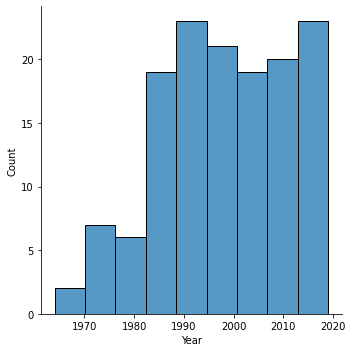

In [89]:
sns.displot(movies_df.Year);

    Majority of action movies are filmed after 1980, which probably related with rapid improvement in filming and CGI technologies

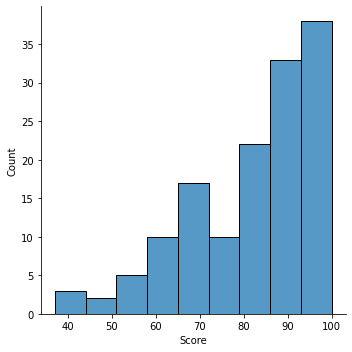

In [91]:
sns.displot(movies_df.Score);

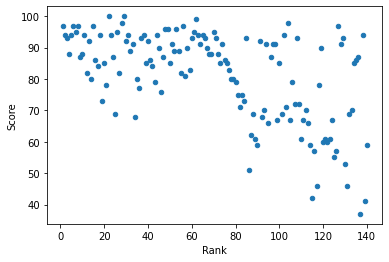

In [99]:
movies_df.plot.scatter(x='Rank', y='Score');

In [101]:
np.corrcoef(movies_df.Score, movies_df.Rank)

array([[ 1.        , -0.56829853],
       [-0.56829853,  1.        ]])

    One may hypothesise that film rank should be correlated with its score. However, from scatter plot above you can notice that its not. Same is proven by correlation coefficient. Nevertheless, one can notice that movies above 60s rank did not scored lower than 60, compared to movies below 60s rank. 

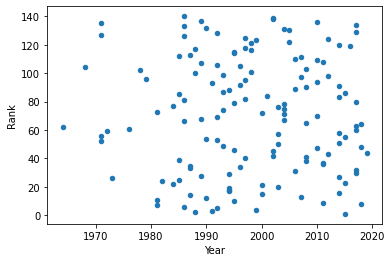

In [120]:
movies_df.plot.scatter('Year', 'Rank');

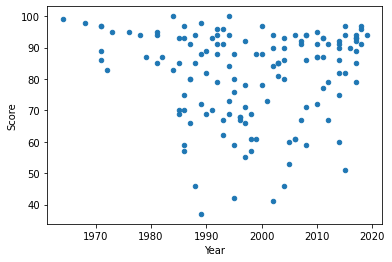

In [121]:
movies_df.plot.scatter('Year', 'Score');

    Movies between 60s and 90s are not below 80 score. Probably, during selection only top movies of older generation were selected.

In [147]:
# Top 5 Directors
top_5_directors = movies_df.groupby('Directors').agg({'Score':'mean', 'Title':'count'}).sort_values(['Title', 'Score'], ascending=False).head(5)
top_5_directors

,Score,Title
Directors,,
John Woo,94.250000,4
James Cameron,89.750000,4
John Carpenter,85.000000,4
Anthony Russo,91.333333,3
Steven Spielberg,91.000000,3


In [163]:
# Top 5 Directors' movies
top_5_directors_movies = movies_df.merge(top_5_directors.reset_index()[['Directors']], on='Directors')[['Directors', 'Title', 'Year', 'Score', 'Rank']]
top_5_directors_movies.sort_values(['Directors', 'Score'], ascending=[True, False])

,Directors,Title,Year,Score,Rank
2,Anthony Russo,Avengers: Endgame,2019,94,44
0,Anthony Russo,Captain America: Civil War,2016,90,119
1,Anthony Russo,Captain America: The Winter Soldier,2014,90,58
8,James Cameron,The Terminator,1984,100,22
9,James Cameron,Aliens,1986,97,6
10,James Cameron,Terminator 2: Judgment Day,1991,93,3
7,James Cameron,True Lies,1994,69,88
6,John Carpenter,Assault on Precinct 13,1976,95,61
3,John Carpenter,They Live,1988,85,100
5,John Carpenter,Escape From New York,1981,85,73
